# Estatística - P4 - Lista 9

## Ex. 2.

Tabela fornecida no enunciado:

| Escolaridade | $n_i$ | $\sum^{n_i}_{j=1}y_{i, j}$ | $\sum^{n_i}_{j=1}y^2_{i, j}$ |
| - | - | - | - |
| Fundamental | $50$ | $111.50$ | $259.93$ |
| Médio | $20$ | $71.00$ | $258.89$ |

A tabela ANOVA é dada por:

| **Fonte de variação (FV)** | **Graus de liberdade (GL)** | **Soma quadrática (SQ)** | **Quadrado médio (QM)** | **F** |
| :- | :-: | :-: | :-: | :-: |
| Entre | $k-1$ | $SQEnt = \sum_{i=1}^Kn_i(\bar{y}_i-\bar{y})^2 = \left(\sum_{i=1}^Kn_i\bar{y}_i^2\right)-n\bar{y}^2$ | $QMEnt = \dfrac{SQReg}{k-1}$ | $F_{obs} = \dfrac{QMEnt}{QMDen}$ |
| Dentro | $n-k$ | $SQDen = \sum_{i=1}^K\sum_{j=1}^{n_i}(y_{i, j}-\bar{y}_i)^2 = \left(\sum_{i=1}^K\sum_{j=1}^{n_i}y_{i, j}^2\right)-\sum^K_{i=1}n_i\bar{y}_i^2$ | $QMDen = \dfrac{SQDen}{n-k}$ |  |
| Total | $n-1$ | $SQTot = \sum_{i=1}^K\sum_{j=1}^{n_i}(y_{i, j}-\bar{y})^2 = \left(\sum_{i=1}^K\sum_{j=1}^{n_i}y_{i, j}^2\right)-n\bar{y}^2$ | $QMTot = \dfrac{SQTot}{n-1}$ |  |

Considerando que $\bar{y} = \dfrac{\sum^K_{i = 1}n_i\bar{y}_i}{n}$, e $\bar{y}_i = \dfrac{\sum^{n_i}_{j=1}y_{i, j}}{n_i}$, então:

$$PT1 = \left(\sum_{i=1}^Kn_i\bar{y}_i^2\right) = \left(\sum_{i=1}^Kn_i\left(\sum_{j=1}^{n_i}\dfrac{y_{i, j}}{n_i}\right)^2\right)$$

$$PT2 = \sum^K_{i=1}\sum^{n_i}_{j=1}y_{i, j}^2$$

$$PT3 = n\bar{y}^2 = \dfrac{1}{n}\left(\sum_{i=1}^Kn_i\bar{y}_i\right)^2$$

de forma então que 

$$SQEn = PT1-PT3$$
$$SQDen = PT2-PT1$$
$$SQTot = PT2-PT3$$

In [1]:
import pandas as pd
import numpy as np

In [2]:
table = pd.DataFrame({'n': [50, 20], 
                     'y': [111.50, 71.00],
                     'y2': [259.93, 258.89]},
                    index = ['Fundamental', 'Médio']
                     )
table

,n,y,y2
Fundamental,50,111.5,259.93
Médio,20,71.0,258.89


In [3]:
ni = table['n']
n = ni.sum()
k = table.shape[0]

yi_mean = table['y']/table['n']
y_mean = (table['n']*yi_mean).sum()/n

yi2 = table['y2']

In [4]:
PT1 = (ni*yi_mean**2).sum()
PT2 = yi2.sum()
PT3 = n*y_mean**2

In [5]:
SQEnt = PT1-PT3
SQDen = PT2-PT1
SQTot = PT2-PT3

QMEnt = SQEnt/(k-1)
QMDen = SQDen/(n-k)
QMTot = SQTot/(n-1)

F = QMEnt/QMDen

In [6]:
ANOVA = pd.DataFrame({'SQ': [SQEnt, SQDen, SQTot],
                     'QM': [QMEnt, QMDen, QMTot],
                     'Fobs': [F, F, F]},
                    index = ['Entre', 'Dentro', 'Total'])
ANOVA

,SQ,QM,Fobs
Entre,24.891429,24.891429,93.385773
Dentro,18.125000,0.266544,93.385773
Total,43.016429,0.623427,93.385773


In [7]:
R2 = ANOVA['SQ'].loc['Entre']/ANOVA['SQ'].loc['Total']
round(R2*100, 2)

57.86

É possível notar que, assim, $57.86\%$ dos dados são explicados através do modelo 2 ($y_{i, j} = \mu_i + e_{i, j}$), o que não é um ganho consideravelmente grande.

## Ex. 4

Tabela fornecida no enunciado:

In [8]:
table = pd.DataFrame({'A': [85, 87, 92, 80, 84],
                     'B': [91, 91, 92, 86, 90]})
table

,A,B
0,85,91
1,87,91
2,92,92
3,80,86
4,84,90


In [9]:
import autoreload
%load_ext autoreload
%autoreload 2

In [10]:
from P4 import *

In [11]:
ANOVA = tabela_ANOVA_from_table(table)
ANOVA.round(2)

,n,SQ,QM,F
Entre,1,48.4,48.4,3.9
Dentro,8,99.2,12.4,3.9
Total,9,147.6,16.4,3.9


É possível testar a hipótese $H_0:\, \mu_1=\mu_2=\dots=\mu_K$ e $H_1:\, \mu_i\ne\mu_{i'}$ para pelo menos um par $(i, i')$. Para este teste, a região crítica é dada por
$$RC = \{F\in\mathbb{R} | F>f_c\}$$
onde $f_c = F_{k-1, n-k}$.

Para $k-1=1$ e $n-k=8$, $f_c = F_{1, 8} = 5.32$, ou seja, $RC = \{F\in\mathbb{R} | F>5.32\}$. Como $F_{obs}=3.90$, então $H_0$ não é rejeitado, ou seja $\mu_A=\mu_B$. Logo, não existem evidências de que uma amrca seja melhor do que outra.

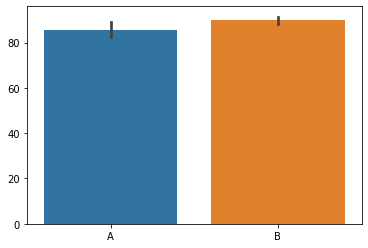

In [12]:
import seaborn as sns
sns.barplot(data = table)

## Ex. 6

Importando a tabela fornecida:

In [13]:
table = pd.DataFrame({'A': [8, 6, 7, 5, 8],
                     'B': [4, -2, 0, -2, 3],
                     'C': [1, 2, 0, -1, -3],
                     'D': [4, 6, 5, 5, 4],
                     'E': [10, 8, 7, 4, 9]})

In [15]:
ANOVA = tabela_ANOVA_from_table(table)
ANOVA.round(2)

,n,SQ,QM,F
Entre,4,253.04,63.26,16.47
Dentro,20,76.80,3.84,16.47
Total,24,329.84,13.74,16.47


Testando as hipóteses $H0:\, \mu_1=\mu_2=\dots=\mu_K$ e $H1:\, \mu_i\ne\mu_{i'}$ para pelo menos um par $(i, i')$, a região crítica será $RC = \{F\in\mathbb{R} | F>f_c\}$, onde $f_c=F_{k-1, n-k}$.

Para $k-1=5$ e $n-k=20$, $f_c = F_{5, 20}=2.71$, ou seja, $RC = \{F\in\mathbb{R} | F>2.71\}$. Como $F_{obs} = 16.47$, então $F_{obs}\in RC$, de forma que $H_0$ é rejeitado e portanto exista pelo menos um par $(i, i')$ tal que $\mu_i\ne\mu_{i'}$.

Para verificar quais pares $(i, i')$ se diferenciam entre sí, é realizado testes através de intervalos de confiança, que são dados por
$$IC(\mu_i-\mu_{i'}, 100(1-\alpha)\%) = (\bar{y}_i-\bar{y}_{i'} \pm C_{i, i'})$$
onde $C_{i, i'} = t_{\frac{\alpha *}{2}, n-k}S_e\sqrt{\frac{1}{n_i}+\frac{1}{n_{i'}}}$, $\alpha * = \dfrac{\alpha}{\binom{K}{2}}$ e $S_e = \sqrt{QMDen}$. Aqui, como $n_i=n_{i'}\forall(i, i')$, então $C_{i, i'} = C = t_{\frac{\alpha *}{2}, n-k}S_e\sqrt{\dfrac{2}{n_i}}$

Ainda, para se determinar se algum valor é diferente de outro, o intervalo de confiança não deve conter o valor $0$, o que é valido apenas para as condições
$$\bar{y}_i-\bar{y}_{i'} > C$$
ou
$$\bar{y}_i-\bar{y}_{i'} < -C$$

In [18]:
from scipy.special import binom

In [23]:
means = table.mean()
alp = 0.05
ni, k = table.shape
n = n*k

Se2 = ANOVA['QM'].loc['Dentro']
alp_estr = alp/binom(k, 2)

In [22]:
from student import *
t = find_t(1-alp_estr, n-k)
t

2.915

In [33]:
C = t*np.sqrt(Se2*2/ni)
C

3.612718865342277

In [44]:
from itertools import combinations
arr = range(len(table.columns))
comb = list(combinations(arr, 2))

In [59]:
def test_diff(table, C):
    arr = range(len(table.columns))
    comb = list(combinations(arr, 2))
    
    means = table.mean()
    
    cols = table.columns
    l = 0
    print('C: ' + str(C))
    for m in comb:
        i = cols[m[0]]
        j = cols[m[1]]
        
        diff = means[i]-means[j]
        print(i + ' - ' + j + ': ' + str(diff))
        print('> C?: ' + str(diff>C))
        print('< -C?: ' + str(diff<-C))
        print('---------')
        

In [60]:
test_diff(table, C)

C: 3.612718865342277
A - B: 6.2
> C?: True
< -C?: False
---------
A - C: 7.0
> C?: True
< -C?: False
---------
A - D: 2.0
> C?: False
< -C?: False
---------
A - E: -0.7999999999999998
> C?: False
< -C?: False
---------
B - C: 0.8
> C?: False
< -C?: False
---------
B - D: -4.2
> C?: False
< -C?: True
---------
B - E: -7.0
> C?: False
< -C?: True
---------
C - D: -5.0
> C?: False
< -C?: True
---------
C - E: -7.8
> C?: False
< -C?: True
---------
D - E: -2.8
> C?: False
< -C?: False
---------


In [61]:
means

A    6.8
B    0.6
C   -0.2
D    4.8
E    7.6
dtype: float64

Logo, os pares $(i, i')$ que se diferenciam entre sí são: $(\mu_A, \mu_B), \, (\mu_A, \mu_C), \, (\mu_D, \mu_B), \, (\mu_e, \mu_B), \, (\mu_C, \mu_D)\, e \, (\mu_C, \mu_E)$.